# Multivariable Linear Regression

Import data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# load data
data = pd.read_csv('stock_data.csv',index_col=0)
y = data['RET']
X = data.drop('RET',axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(data.shape)
data.head()

(3481, 67)


,RET,CAPEI,bm,evm,pe_op_basic,pe_exi,pe_inc,ps,pcf,dpr,...,rect_turn,pay_turn,sale_invcap,sale_equity,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb
1,-0.088191,0.759381,-0.999558,0.696751,0.079703,0.007577,-0.021611,-0.992676,0.147590,-0.956408,...,-0.998073,-0.932030,-0.870970,-0.987193,0.648937,-0.999998,-0.998952,-1.0,0.551959,-0.910672
2,0.079484,0.757554,-0.999718,0.700319,-0.130809,-0.176777,-0.208520,-0.998950,-0.447588,-0.958060,...,-0.973573,-0.932865,-0.801126,-0.926463,0.649039,-1.000000,-0.995808,-1.0,0.549097,-0.916289
3,-0.015975,0.758821,-0.999205,0.696543,0.022296,-0.046242,-0.076176,-0.997872,0.103177,-0.959754,...,-0.998721,-0.936796,-0.863408,-0.980141,0.648930,-1.000000,-1.000000,-1.0,0.550775,-0.956189
4,0.051836,0.758721,-0.999590,0.696393,0.027334,-0.041370,-0.071237,-0.994922,0.107730,-0.952962,...,-0.998041,-0.928855,-0.869320,-0.984026,0.648950,-1.000000,-0.996647,-1.0,0.552304,-0.916565
5,0.095178,0.758717,-0.999612,0.696722,0.027037,-0.039758,-0.069602,-0.985473,0.108669,-0.957310,...,-0.998229,-0.931362,-0.882201,-0.994100,0.648897,-0.999702,-0.999371,-1.0,0.551169,-0.918346


Data visualising

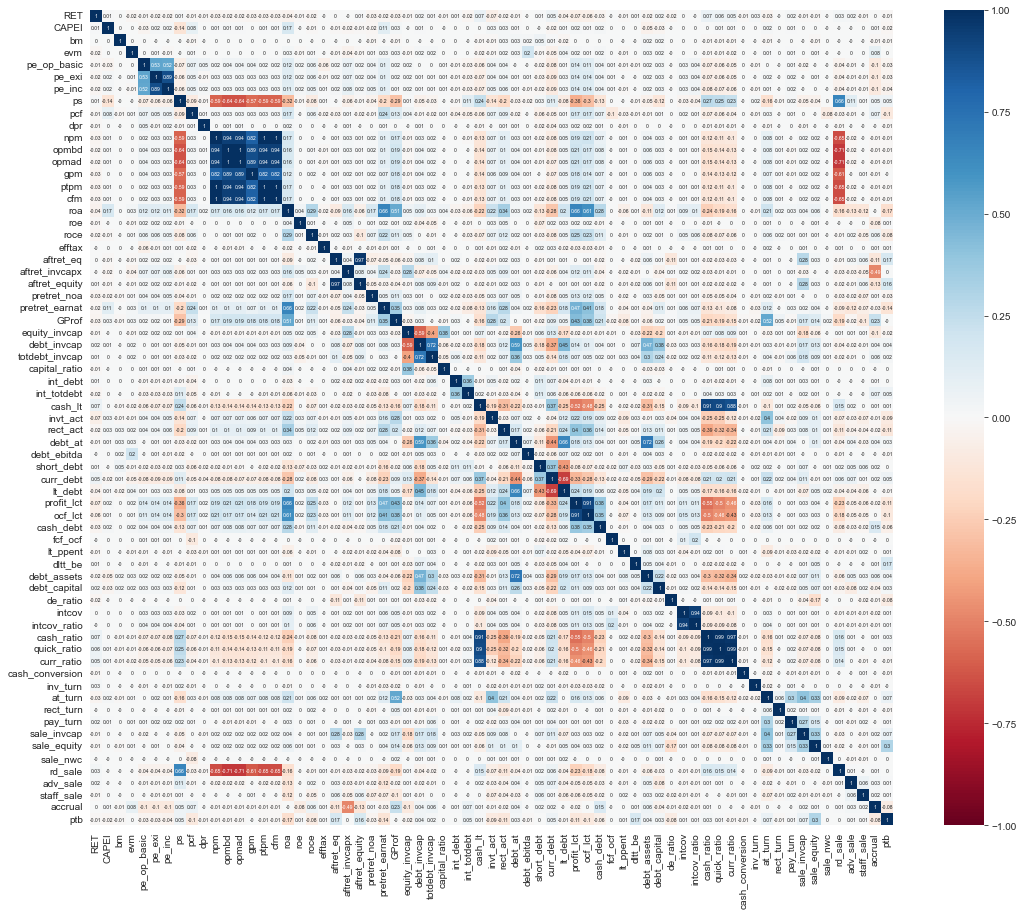

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,15))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
            annot_kws={"size": 5}, vmin=-1, vmax=1);

## multiple linear regression

In [4]:
import statsmodels.api as sm

sm.OLS(y_train,sm.add_constant(X_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    RET   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.371
Date:                Mon, 17 Oct 2022   Prob (F-statistic):             0.0266
Time:                        15:15:13   Log-Likelihood:                 1215.5
No. Observations:                2436   AIC:                            -2297.
Df Residuals:                    2369   BIC:                            -1908.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1164      1.480     -0.079      0.937      -3.019       2.786
CAPEI              -0.0434      0.083     -0.522      0.602      -0.206       0.120
bm                  0.0072      0.075      0.096      0.924      -0.140       0.155
evm                -0.0047      0.267     -0.018      0.986      -0.527       0.518
pe_op_basic         0.0012      0.019      0.064      0.949      -0.035       0.038
pe_exi             -0.0372      0.035     -1.058      0.290      -0.106       0.032
pe_inc              0.0349      0.035      1.004      0.316      -0.033       0.103
ps                 -0.0547      0.023     -2.405      0.016      -0.099      -0.010
pcf                 0.0061      0.017      0.366      0.714      -0.027       0.039
dpr                -0.0448      0.165     -0.271      0.786      -0.368       0.279
npm                 1.0821      0.914      1.184      0.237      -0.710       2.874
opmbd              -2.1062     11.156     -0.189      0.850     -23.982      19.770
opmad               2.1079     11.100      0.190      0.849     -19.659      23.875
gpm                -0.1175      0.147     -0.798      0.425      -0.406       0.171
ptpm                1.8307     13.933      0.131      0.895     -25.492      29.153
cfm                -2.8383     13.988     -0.203      0.839     -30.268      24.591
roa                 0.0040      0.073      0.055      0.957      -0.139       0.147
roe                 0.0125      0.063      0.200      0.842      -0.110       0.136
roce                0.0845      0.085      0.991      0.322      -0.083       0.252
efftax             -0.0293      0.071     -0.410      0.682      -0.169       0.111
aftret_eq          -0.4850      0.328     -1.480      0.139      -1.128       0.158
aftret_invcapx     -0.0656      0.162     -0.406      0.685      -0.382       0.251
aftret_equity       0.5564      0.335      1.659      0.097      -0.101       1.214
pretret_noa        -0.0446      0.070     -0.641      0.521      -0.181       0.092
pretret_earnat      0.0447      0.071      0.632      0.527      -0.094       0.183
GProf              -0.0195      0.060     -0.323      0.746      -0.138       0.099
equity_invcap       0.0328      0.096      0.343      0.731      -0.155       0.220
debt_invcap         0.0951      0.091      1.040      0.298      -0.084       0.274
totdebt_invcap     -0.0747      0.113     -0.660      0.509      -0.297       0.147
capital_ratio      -0.0334      0.089     -0.373      0.709      -0.209       0.142
int_debt            0.1042      0.081      1.292      0.196      -0.054       0.262
int_totdebt        -0.0840      0.063     -1.334      0.182      -0.207       0.039
cash_lt            -0.1720      0.132     -1.299      0.194      -0.432       0.088
invt_act           -0.0101      0.014     -0.721      0.471